# Amazon Prime Video EDA

In [1]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import the warnings module to suppress any warnings that might occur during code execution
import warnings

from wordcloud import WordCloud, STOPWORDS

# Suppress warnings to improve code readability
warnings.filterwarnings('ignore')


In [2]:
df_prime = pd.read_csv('data/amazon_prime_titles.csv')

**Dataset First View**

We perform the first searches in our dataframe in order to understand how it is formed and look for the first peculiarities and correlations.

In [3]:
df_prime.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df_prime.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


Printing the number of rows and attributes.

In [5]:
print(f'The number of rows: {df_prime.shape[0]}')
print(f'The number of columns: {df_prime.shape[1]}')

The number of rows: 9668
The number of columns: 12


Listing the number of null values for each attribute.

In [6]:
df_prime.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

We look for the distribution of product types present in the dataframe.

The number of movies listed is: 7814
The number of tv shows listed is: 1854


<Axes: xlabel='type', ylabel='amount'>

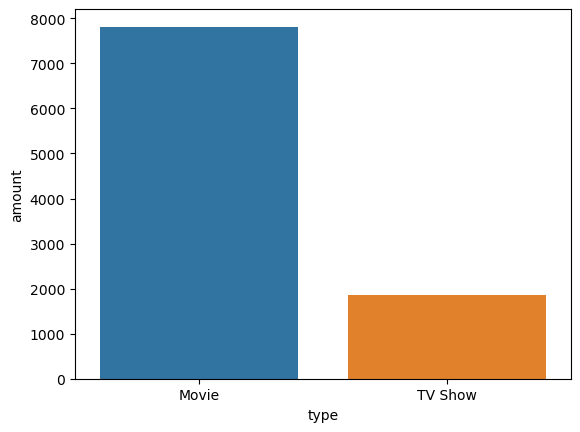

In [7]:
movies = df_prime.loc[df_prime['type'] == 'Movie'].shape[0]
tv_shows = df_prime.loc[df_prime['type'] == 'TV Show'].shape[0]

prime_type = [['Movie', movies], ['TV Show', tv_shows]]
df_prime_type = pd.DataFrame(prime_type, columns=['type', 'amount'])

print(f'The number of movies listed is: {movies}')
print(f'The number of tv shows listed is: {tv_shows}')

sns.barplot(df_prime_type, x='type', y='amount')

Now let's find out how many products we have for each year present in the prime catalog.

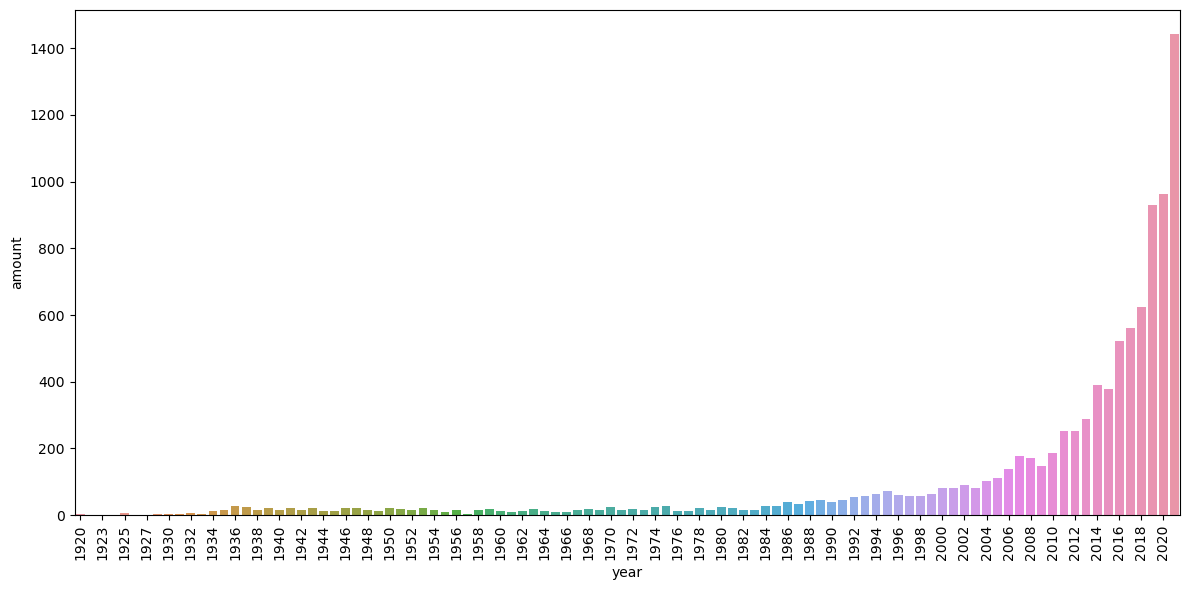

In [8]:
prime_years = df_prime.groupby(['release_year'])['release_year'].count()

prime_years.name = 'count'

df_prime_years = pd.DataFrame(prime_years).reset_index()
df_prime_years.columns = ['year', 'amount']

plt.figure(figsize=(12,6))
sns.barplot(df_prime_years, x='year', y='amount')
plt.xticks(ticks=range(0, len(df_prime_years['year']), 2), rotation=90, labels=df_prime_years['year'][::2])
plt.tight_layout()
plt.show()

Let's see how many visual products we have for each country in the prime catalog.

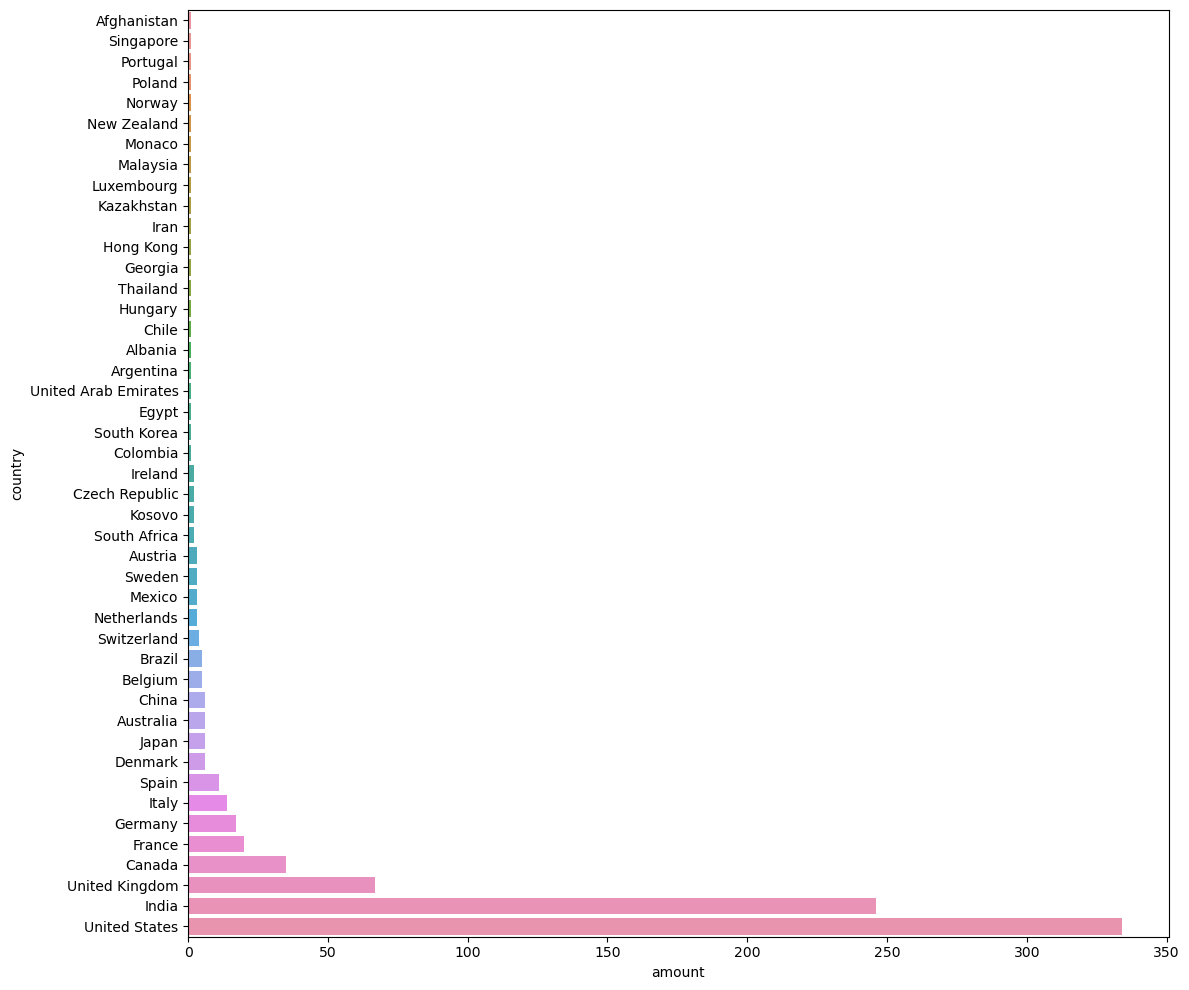

In [9]:
#since in the original df in the country column there are also multiple values, we need to split them
#to do this, we expand each row where the country column has more than one country, then for each country we associate its own row

df_prime_expanded_country = df_prime.assign(country = df_prime['country'].str.split(', ')).explode('country').reset_index(drop=True)

#with the new df just created we can group each product for each country

prime_country = df_prime_expanded_country.groupby(['country'])['country'].count()

prime_country.name = 'count'

df_prime_country = pd.DataFrame(prime_country).reset_index()
df_prime_country.columns = ['country', 'amount']
df_prime_country.sort_values('amount', inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(df_prime_country, x='amount', y='country', orient='h')
plt.tight_layout()

It is noteworthy that the majority of the products originate from the United States, but even more striking is the significant presence of products from India. This trend, however, aligns perfectly with Amazon’s strategic expansion plan, which has long identified India as a key market. Since its entry into the country in 2013, the company founded by Jeff Bezos has strived to provide a highly localized service, supporting multiple regional languages, offering various purchasing methods, and launching special promotions tied to local events. Furthermore, upon recognizing that Amazon Prime had become the most popular streaming platform among Indian consumers, the company expanded its content library to include a wide range of Indian films and television series, aiming to better meet the preferences of the local audience.

**Deeper insight into data**

Let's see the distribution of movie lengths (in minutes) and TV series lengths (in seasons).

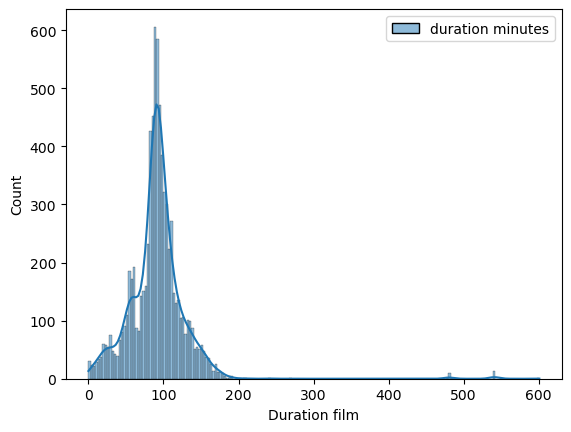

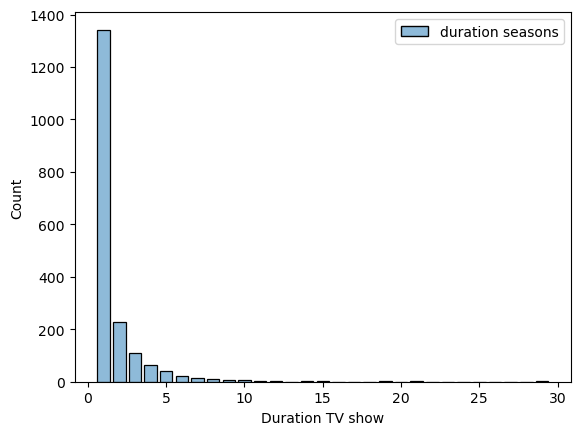

In [10]:
#we remove from the column duration the value 'min' from every movie
df_prime_deleted_min = df_prime.assign(duration = df_prime['duration'].str.split(' ').str[0])

prime_duration_film = df_prime_deleted_min.loc[df_prime_deleted_min['type'] == 'Movie']['duration']

df_prime_duration_film  = prime_duration_film.to_frame().astype(int).rename(columns={'duration':'duration minutes'})

sns.histplot(df_prime_duration_film, kde=True)
plt.xlabel('Duration film')
plt.show()

#we remove from the column duration the value 'seasons' or 'season' from every tv shows
df_prime_deleted_season = df_prime.assign(duration = df_prime['duration'].str.split(' ').str[0])

prime_duration_tv_show = df_prime_deleted_season.loc[df_prime_deleted_season['type'] == 'TV Show']['duration']

df_prime_duration_tv_show  = prime_duration_tv_show.to_frame().astype(int).rename(columns={'duration':'duration seasons'})

sns.histplot(df_prime_duration_tv_show, discrete=True, shrink=.8)
plt.xlabel('Duration TV show')
plt.show()

We are looking for the most recurring actors in Prime content.

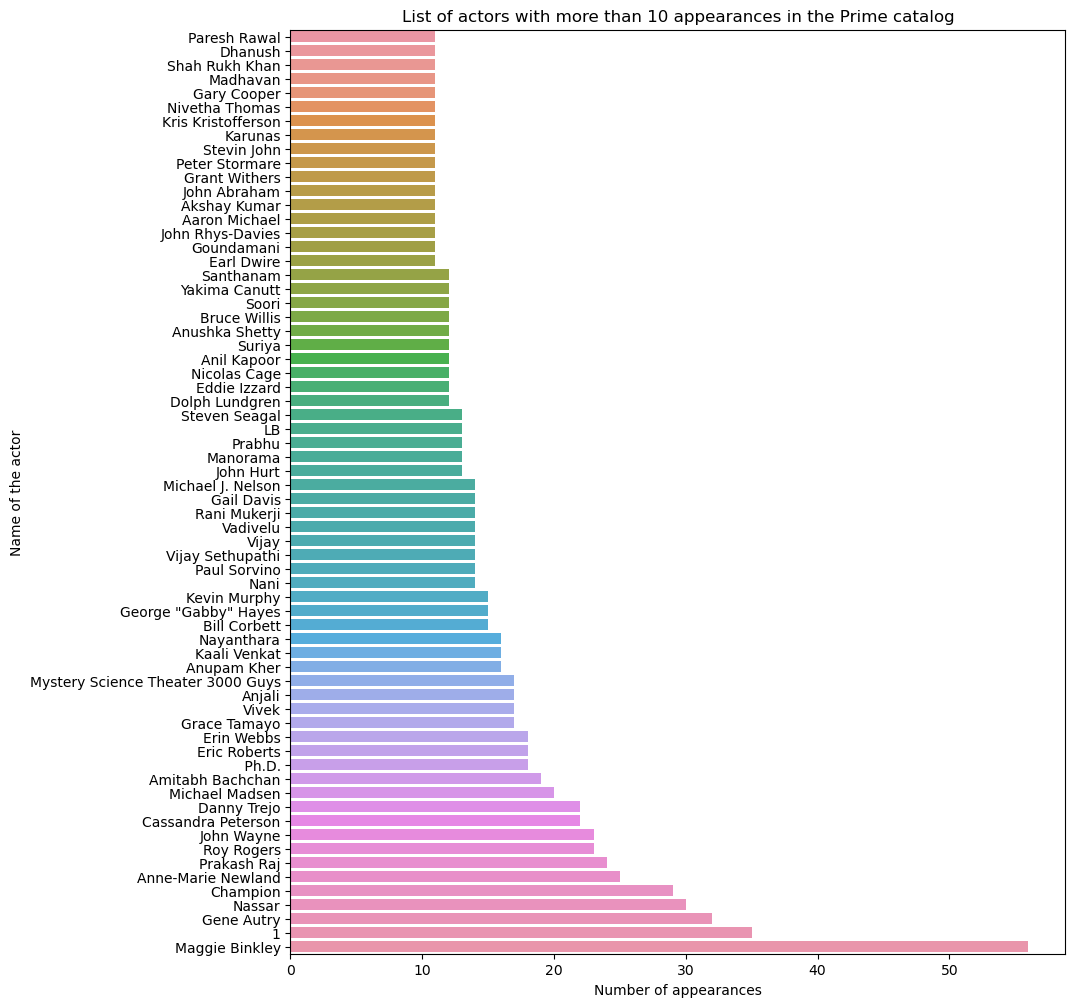

In [11]:
df_prime_cast_expanded = df_prime.assign(cast = df_prime['cast'].str.split(', ')).explode('cast').reset_index(drop=True)

prime_cast = df_prime_cast_expanded.groupby('cast')['cast'].count()

prime_cast.name = 'count'

df_prime_cast = pd.DataFrame(prime_cast).reset_index()
df_prime_cast.columns = ['name', 'amount']

df_prime_cast_recourrent = df_prime_cast.loc[df_prime_cast['amount'] > 10]
df_prime_cast_recourrent.sort_values('amount', inplace=True)

plt.figure(figsize=(10, 12))
sns.barplot(df_prime_cast_recourrent, x='amount', y='name', orient='h')
plt.title('List of actors with more than 10 appearances in the Prime catalog')
plt.xlabel('Number of appearances')
plt.ylabel('Name of the actor')
plt.show()

As we can observe, there is a predominance of Indian actors, which aligns perfectly with our earlier finding regarding the strong presence of Indian films. Furthermore, there is a notable recurrence of Maggie Binkley’s name. This is due to a content distribution strategy employed by Prime Video, whereby certain types of content—such as a series of 15-minute workout episodes—are published as standalone entries rather than as part of a single series. As a result, each episode is treated as a separate and unique title.

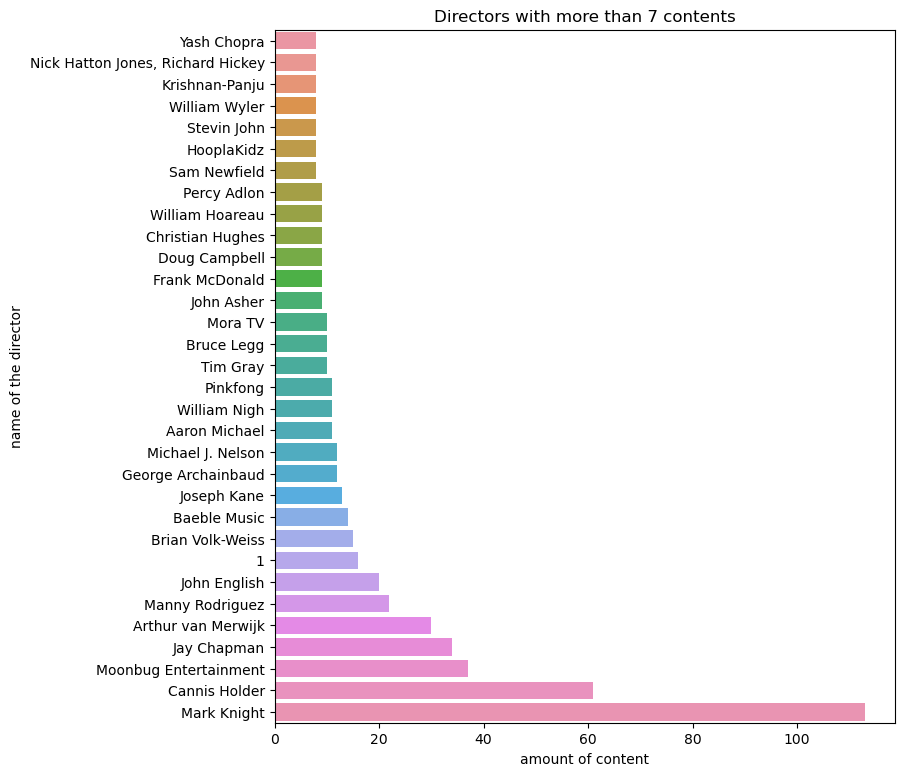

In [12]:
prime_director = df_prime.groupby('director')['director'].count()

prime_director.name = 'count'

df_prime_director = pd.DataFrame(prime_director).reset_index()
df_prime_director.columns = ['name', 'amount']

df_prime_director_more_than_7_products = df_prime_director.loc[df_prime_director['amount'] > 7]
df_prime_director_more_than_7_products.sort_values('amount', inplace=True)

plt.figure(figsize=(8, 9))
sns.barplot(df_prime_director_more_than_7_products, x='amount', y='name', orient='h')
plt.title('Directors with more than 7 contents')
plt.xlabel('amount of content')
plt.ylabel('name of the director')
plt.show()

As we can observe, there is a strong presence of relatively unknown names who produce easily replicable content, allowing for a high publication rate. Mark Knight ranks first due to his ambient videos, which consist solely of sounds and are typically used as background audio. On the other hand, Moonbug Entertainment specializes in animated content, which explains its significant presence.

**Expert data analysis**

We will now carry out a more in-depth analysis of the dataset. We will start by identifying the most popular genres and examining how their popularity has evolved over time.

<Figure size 1400x700 with 0 Axes>

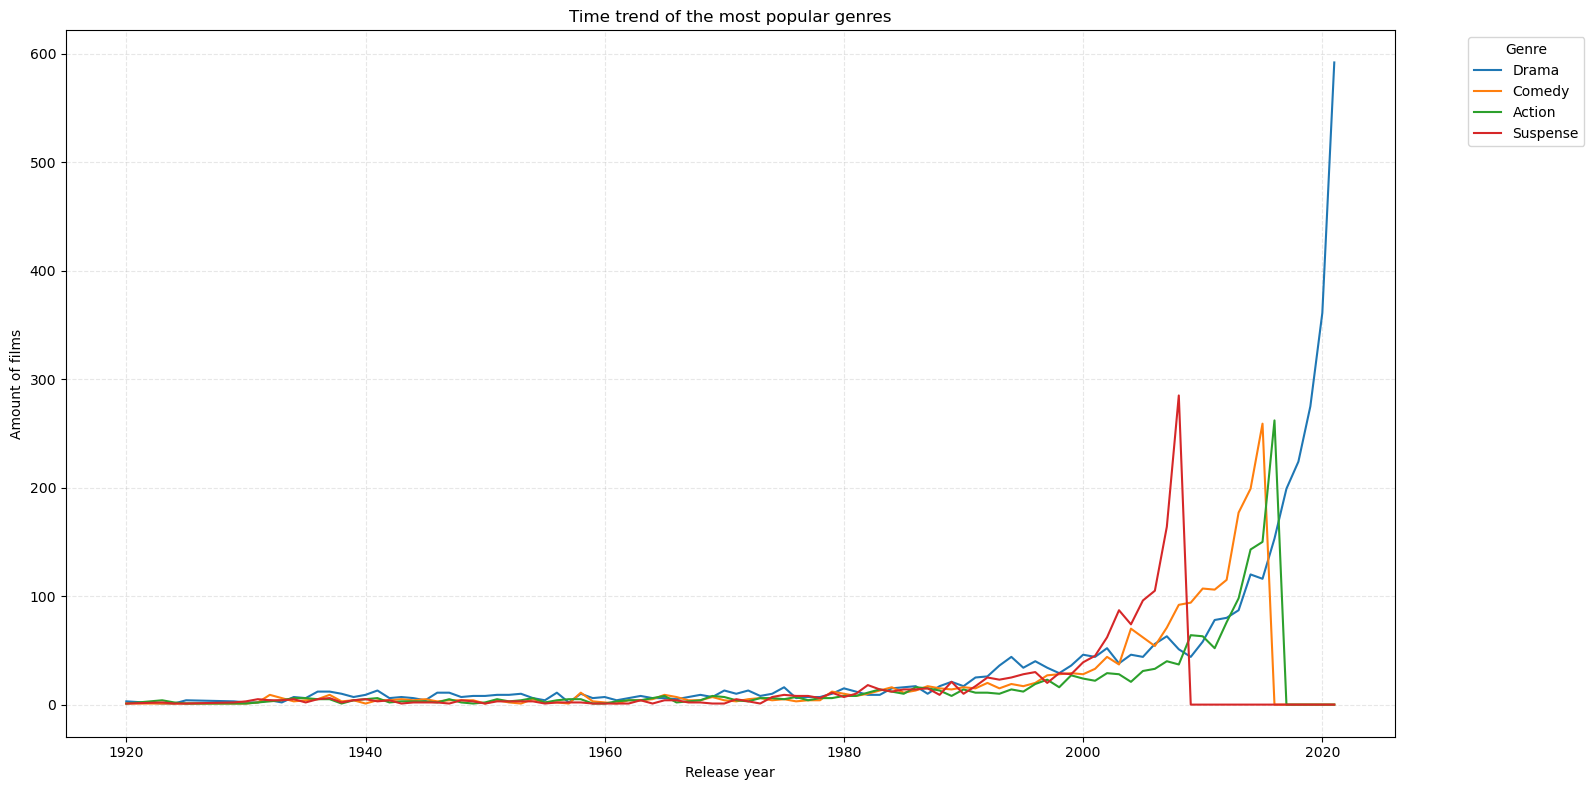

In [13]:
#we expand the genres so that each product has one genre per row and there is no more than one genre per row
df_prime_listed_in_expanded = df_prime.assign(listed_in = df_prime['listed_in'].str.split(', ')).explode('listed_in').reset_index(drop=True)

#df grouped by genre
prime_listed_in = df_prime_listed_in_expanded.groupby('listed_in')
#Let's search in most popular genres
top_prime_listed_in = prime_listed_in['listed_in'].count()

top_prime_listed_in.name = 'count'

df_top_prime_listed_in = pd.DataFrame(top_prime_listed_in).reset_index()
df_top_prime_listed_in.columns = ['genre', 'amount']
df_top_prime_listed_in.sort_values('amount', inplace=True, ascending=False)

top_genre = df_top_prime_listed_in.loc[df_top_prime_listed_in['amount'] > 1500]['genre'].to_list()

#we cycle through the most popular genres we found and make plots to see their progression over time
df_all_genre = None

for genre in top_genre:
	prime_genre = prime_listed_in.get_group(genre).groupby('release_year')['release_year'].count()

	prime_genre.name = 'count'

	df_prime_genre = pd.DataFrame(prime_genre).reset_index()
	df_prime_genre.columns = ['year', genre]

	if df_all_genre is None:
		df_all_genre = df_prime_genre
	else:
		df_all_genre = pd.concat([df_all_genre, df_prime_genre[genre]], axis=1)

#replaces NaN values ​​with 0, this way all genres that have no movies in a given year will have 0
df_all_genre = df_all_genre.fillna(0)

# Set 'year' as index
df_all_genre.set_index('year', inplace=True)

plt.figure(figsize=(14, 7))
df_all_genre.plot(kind='line', figsize=(16, 8))

plt.title('Time trend of the most popular genres')
plt.xlabel('Release year')
plt.ylabel('Amount of films')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Now let's look for the most common words used in movie titles using a word cloud.

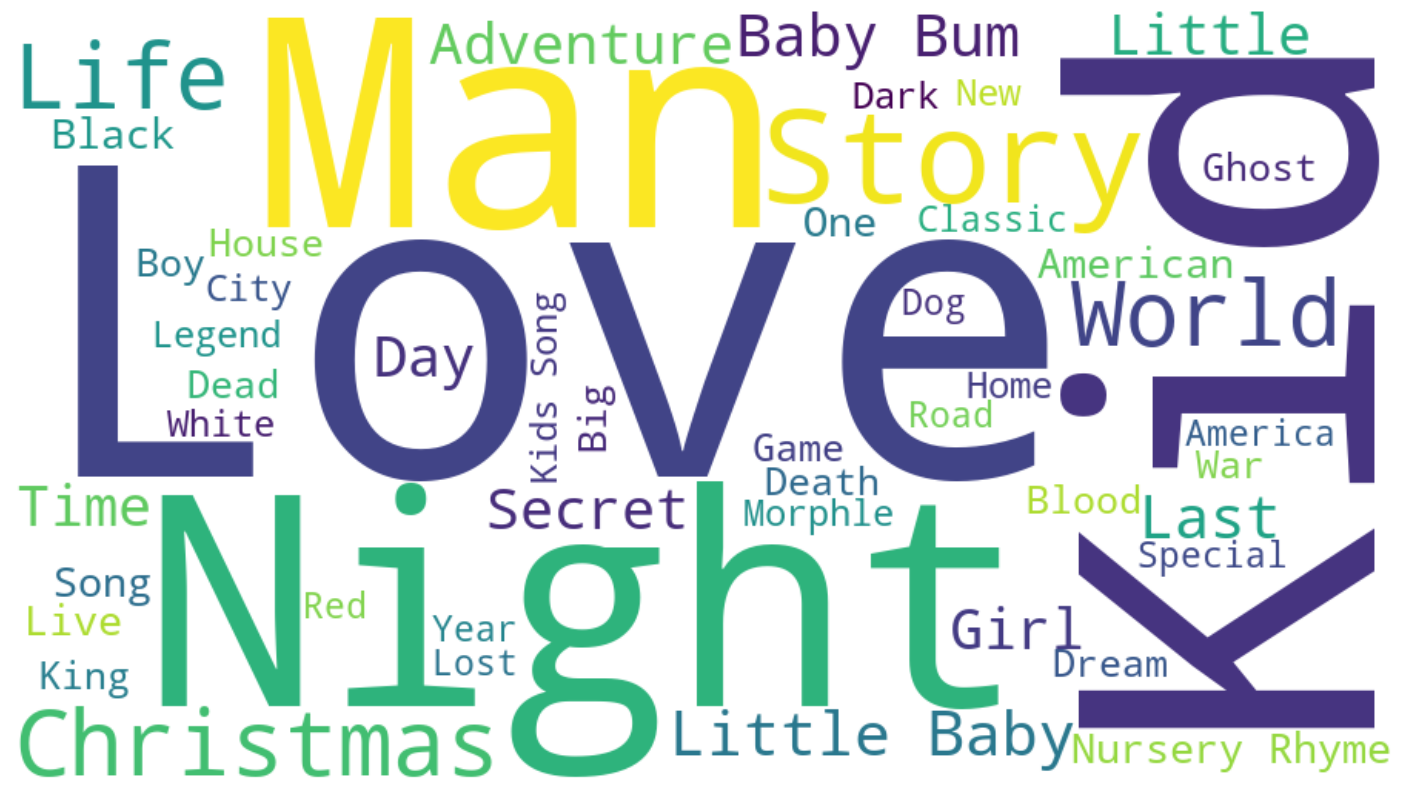

In [14]:
#we join all the words contained in the titles into a single string
words_in_titles = " ".join(tit for tit in df_prime.title)

#we block these words so they will not be evaluated in the word cloud
stopwords = set(STOPWORDS)
stopwords.update(['4K', 'UHD', 'U', 'V'])

wordcloud = WordCloud(width=900, height=500, max_words=50, background_color='white', stopwords=stopwords).generate(words_in_titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

A quick glance at this word cloud suggests that most of the content in the catalog is family-oriented and intended for group viewing during the holiday season. This assumption is supported by the frequent appearance of terms such as 'Love', 'Christmas', and 'Kid', which are among the most commonly used.